In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./13_heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<br><br>
<font size=6>Data Cleaning</font>

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

If NaN present:<br>
Drop: df.dropna()<br>
Fill: df.fillna(val)<br>
Fill using prev: df.fillna(method ='pad')<br>
Fill using next: df.fillna(method ='bfill')<br>
Replace: data.replace(to_replace = np.nan, value = -99)<br>

In [9]:
# For negative find count 
(df < 0).sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Change lower bound to 0: df.clip(lower=0)<br>
or: data_frame.where(data_frame < 0, 0)

<br><br>
# Error Correction:

### Calculate the upper and lower limits
Q1 = df_diabetes['bmi'].quantile(0.25)<br>
Q3 = df_diabetes['bmi'].quantile(0.75)<br>
IQR = Q3 - Q1<br>
lower = Q1 - 1.5*IQR<br>
upper = Q3 + 1.5*IQR<br>
 
### Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetes['bmi']>=upper)[0]<br>
lower_array = np.where(df_diabetes['bmi']<=lower)[0]<br>
 
### Removing the outliers
df_diabetes.drop(index=upper_array, inplace=True)<br>
df_diabetes.drop(index=lower_array, inplace=True)<br>

<br><br>
# Data Transformation / Model Train

In [16]:
x= df.iloc[:,0:13].values 
y= df['target'].values

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

Minimum error:- 0.0 at K = 1


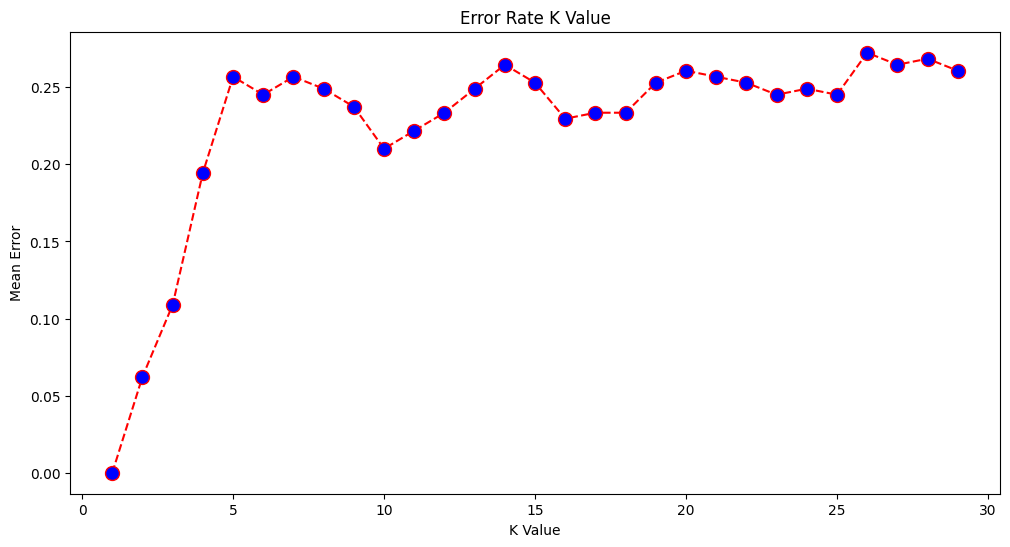

In [17]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)
# Output => Minimum error:- 0.13157894736842105 at K = 7

In [20]:
from sklearn.metrics import accuracy_score
classifier= KNeighborsClassifier(n_neighbors=2)  
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test) 
print(accuracy_score(y_test, y_pred))

0.9377431906614786
